<a href="https://colab.research.google.com/github/K02D/Interpretable_HPO/blob/main/HPO_Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [ ]:
# Read data from NMT models trained on an English-to-Japanese corpus
hyp_data = pd.read_csv('en-ja.hyps_scaled', delimiter="\t")
eval_data = pd.read_csv('en-ja.evals', delimiter="\t")

In [ ]:
# Select scaled hyperparameter configurations as the input features
X = hyp_data

# Select first column of evaluation data, having dev_bleu values, as the target
y = eval_data[eval_data.columns[0]]

In [ ]:
# Check if number of rows is the same in target and input data
print(X)
print(y)

     0.5  0.0  0.5.1  0.0.1  0.0.2  0.0.3
0    0.0  1.0    0.0    1.0    1.0  1.000
1    0.0  0.0    0.5    0.0    1.0  0.429
2    0.0  1.0    0.0    0.0    0.0  0.000
3    0.5  1.0    0.0    0.0    1.0  1.000
4    0.0  1.0    0.5    1.0    1.0  0.429
..   ...  ...    ...    ...    ...    ...
162  1.0  1.0    0.0    0.0    0.0  1.000
163  0.5  0.0    1.0    0.0    0.0  0.000
164  0.0  1.0    0.5    0.0    0.0  1.000
165  1.0  0.0    0.0    1.0    0.0  1.000
166  0.0  1.0    0.5    0.0    0.0  0.429

[167 rows x 6 columns]
0      18.18
1      17.50
2      18.42
3      18.16
4      20.08
       ...  
162    17.95
163    18.43
164     8.13
165    16.71
166    19.20
Name: 18.2, Length: 167, dtype: float64


In [ ]:
# Split randomly into training and validation sets: 80% training, 20% validation 
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1) 

In [ ]:
# Fit multiple linear regression model on training data
reg = linear_model.LinearRegression()
reg.fit(train_X, train_y)

# Generate predictions on validation input data
pred_y = reg.predict(val_X) 

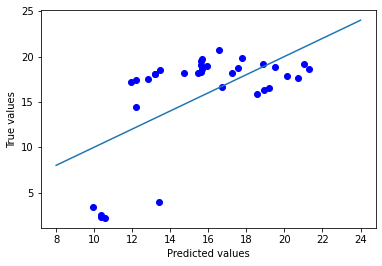

In [ ]:
 # Plot model predicted values (x-axis) against ground truth values (y-axis)
plt.scatter(pred_y, val_y, color ='b')

# Plot line y = x 
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x) 
    plt.plot(x, y)  
graph(lambda x: x, range(8, 25))

plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.show()

The graph does NOT show the linear model that was fitted; rather, it provides a 
visualization of how close the predicted *dev_bleu* values are to the actual *dev_bleu* values.
The closer the points to the plotted line y=x, the better the model.

In [ ]:
mse = metrics.mean_squared_error(val_y, pred_y)
rmse = metrics.mean_squared_error(val_y, pred_y, squared=False)
mae = metrics.mean_absolute_error(val_y, pred_y)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 18.882329743489677
Root Mean Squared Error: 4.34538027605061
Mean Absolute Error: 3.70614425810706


In [ ]:
hyps = ["bpe_symbols", "num_layers, num_embed", "transformer_feed_forward_num_hidden", 
        "transformer_attention_heads", "initial_learning_rate"]
for hyp, w in zip(hyps, reg.coef_):
  print(f"{hyp}: {w}")

bpe_symbols: -1.2609217634306695
num_layers, num_embed: 0.5752615632434953
transformer_feed_forward_num_hidden: -5.728354175820752
transformer_attention_heads: 0.6158345462041624
initial_learning_rate: -0.3822526340755604
